In [1]:
# classification dataset
from sklearn.datasets import make_classification

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

In [3]:
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [4]:
# evaluate pca with logoistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

In [5]:
# define the pipeline
steps = [('svd', TruncatedSVD(n_components=10)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [6]:
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [7]:
# report peroformnace
print('ACCURACY: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

ACCURACY: 0.814 (0.034)


In [8]:
# compare svd number of componants with naive bayes algorithm for classification
from matplotlib import pyplot

In [9]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    return X, y

In [10]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1, 20):
        steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [11]:
# evaluate a given model using cross_validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [12]:
# define dataset
X, y = get_dataset()

In [13]:
# get the models to evaluate
models = get_models()

In [14]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.542 (0.046)
>2 0.626 (0.050)
>3 0.719 (0.053)
>4 0.722 (0.052)
>5 0.721 (0.054)
>6 0.729 (0.045)
>7 0.802 (0.034)
>8 0.800 (0.040)
>9 0.814 (0.037)
>10 0.814 (0.034)
>11 0.817 (0.037)
>12 0.820 (0.038)
>13 0.820 (0.036)
>14 0.825 (0.036)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)


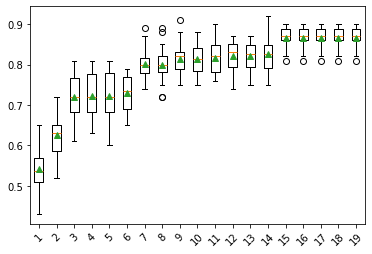

In [15]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [16]:
# make prediction using pca with logisticregression
# define the model
steps = [('svd', TruncatedSVD(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [17]:
# fit the model on the whole dataset
model.fit(X, y)

Pipeline(steps=[('svd', TruncatedSVD(n_components=15)),
                ('m', LogisticRegression())])

In [18]:
# make a single prediction
row =[[0.2929949, -4.212223056, -1.288332, -2.17849815, -0.64527665, 2.58097719,
       0.28422388, -7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799,
       3.34692332, 4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]]
yhat = model.predict(row)
print('PREDICTED CLASS : %d' % yhat[0])

PREDICTED CLASS : 1
